# Supervised Learning project

### About project

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

### Project Plan 

1. **Downloading and preparing the data**
2. **Examining the balance of classes.**
3. **Improving the quality of the model**
4. **Performing the final testing**
5. **General Conclusion**

## Step1. Downloading and preparing the data

In [1]:
# Here we have impelemented libraries that we will use on project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

In [2]:
# Opening and Exploring data
churn = pd.read_csv('/datasets/Churn.csv')
print(churn.info())
churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [4]:
# Checking data for duplicates and Nan's
print(churn.duplicated().sum())
print(churn.isna().sum())

0
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64


In [5]:
#Handling missing NaN values
churn['Tenure'] = churn['Tenure'].fillna(churn['Tenure'].median())
print(churn.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
#Dropping columns that will make other connections and will affect model's prediction
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
churn.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [7]:
#Seeking to correlation between columns
churn.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,-0.000060,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.012606,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.000060,-0.012606,1.000000,-0.007535,0.011409,0.025979,-0.030681,0.010049,-0.015989
Balance,0.006268,0.028308,-0.007535,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.011409,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.025979,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.030681,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.010049,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.015989,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [8]:
#One Hot Encoding Geography and Gender columns
churn_ohe = pd.get_dummies(churn,drop_first=True)
churn_ohe.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
#Scaling numeric columns wich is shown below
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(churn_ohe[numeric])
churn_ohe[numeric] = scaler.transform(churn_ohe[numeric])
churn_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.086246,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.448581,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.087768,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.448581,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.086246,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


In [10]:
#Data splitting process 
data_train, data_left = train_test_split(churn_ohe, test_size = 0.4, random_state = 12345)
data_validation, data_test = train_test_split(data_left, test_size = 0.5, random_state = 12345)

#targets
train_target = data_train['Exited']
validation_target = data_validation['Exited']
test_target = data_test['Exited']

#Features
train_features = data_train.drop('Exited',axis = 1)
validation_features = data_validation.drop('Exited',axis = 1)
test_features = data_test.drop('Exited',axis = 1)

print("Train_target's size:", len(train_target))
print("Validation_target's size:", len(validation_target))
print("Test_target's size:", len(test_target))
print('------------------------')
print("train_features size:", len(train_features))
print("validation_features size:", len(validation_features))
print("test_features size:", len(test_features))


Train_target's size: 6000
Validation_target's size: 2000
Test_target's size: 2000
------------------------
train_features size: 6000
validation_features size: 2000
test_features size: 2000


### Conclusion

Firstly we have explored data. Then checked for `duplicates` and `missing values`. We handled missing values by replacing it with median. We did this because of median will not affect on final results as median and we didnot choose dropping missing values because it is not best option. Then we have dropped columns such `"row id", client id and etc.`. Because model will make unrelated connections if we would not drop. Then we use`OHE` for categorical columns. After that we  scaled numeric columns. `train, validation and test` sets. Now our data is preprocessed and ready to working with model. 

## Step2. Examining the balance of classes

In [11]:
#Pilot running of model with LR model
model = LogisticRegression(solver='liblinear',random_state = 12345)
model.fit(train_features,train_target)
predicted_valid = model.predict(validation_features)
print('Accuracy score for LR model: {:.3f}'.format(accuracy_score(validation_target, predicted_valid)))
print('F1 score for LR model: {:.3f}'.format(f1_score(validation_target,predicted_valid)))


Accuracy score for LR model: 0.802
F1 score for LR model: 0.331


### Conclusion

On this step we have examined our model. Our accuracy was high enough, but f1 score was very low. Cause of this may be there is strong imbalance between `negative` and `positive`. On next step we will handle imbalance features.

## Step3. Improving the quality of the model

In [12]:
# Upsample function
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state = 12345)
    
    return features_upsampled, target_upsampled

# Downsample function
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [13]:
features_zeros = train_features[train_target == 0]
features_ones = train_features[train_target == 1]
print('Negative class {:.0f} times bigger than positive class'.format(len(features_zeros) / len(features_ones)))

Negative class 4 times bigger than positive class


In [14]:
#Upsampling data and checking f1 score of model
features_upsampled, target_upsampled = upsample(train_features, train_target, 4)


model = LogisticRegression(random_state = 12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(validation_features)
print("F1: " , f1_score(validation_target, predicted_valid))
print('Accuracy score for LR model: {:.3f}'.format(accuracy_score(validation_target, predicted_valid)))

F1:  0.4888507718696398
Accuracy score for LR model: 0.702


In [15]:
#Downsampling data and checking f1 score of model
# Negative class 4 times bigger we are using downsampling technique, so fraction = 1 / 4 = 0.25
features_downsampled, target_downsampled = downsample(train_features, train_target, 0.25)

model = LogisticRegression(random_state = 12345, solver = 'liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(validation_features)
print("F1:", f1_score(validation_target, predicted_valid))
print('Accuracy score for LR model: {:.3f}'.format(accuracy_score(validation_target, predicted_valid)))

F1: 0.48406546080964685
Accuracy score for LR model: 0.701


In [16]:
#Playing with threshold value for finding better value of it
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(train_features, train_target)
probabilities_valid = model.predict_proba(validation_features)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.52, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(validation_target, predicted_valid)
    recall = recall_score(validation_target,predicted_valid)
    f_one = f1_score(validation_target, predicted_valid)
    
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3f}".format(threshold, precision, recall,f_one))

Threshold = 0.00 | Precision = 0.209, Recall = 1.000, F1 = 0.346
Threshold = 0.02 | Precision = 0.211, Recall = 1.000, F1 = 0.348
Threshold = 0.04 | Precision = 0.226, Recall = 0.990, F1 = 0.369
Threshold = 0.06 | Precision = 0.245, Recall = 0.964, F1 = 0.391
Threshold = 0.08 | Precision = 0.259, Recall = 0.933, F1 = 0.405
Threshold = 0.10 | Precision = 0.276, Recall = 0.897, F1 = 0.423
Threshold = 0.12 | Precision = 0.299, Recall = 0.864, F1 = 0.444
Threshold = 0.14 | Precision = 0.322, Recall = 0.818, F1 = 0.462
Threshold = 0.16 | Precision = 0.336, Recall = 0.773, F1 = 0.468
Threshold = 0.18 | Precision = 0.359, Recall = 0.732, F1 = 0.482
Threshold = 0.20 | Precision = 0.370, Recall = 0.677, F1 = 0.478
Threshold = 0.22 | Precision = 0.389, Recall = 0.634, F1 = 0.482
Threshold = 0.24 | Precision = 0.417, Recall = 0.617, F1 = 0.498
Threshold = 0.26 | Precision = 0.434, Recall = 0.586, F1 = 0.499
Threshold = 0.28 | Precision = 0.437, Recall = 0.550, F1 = 0.487
Threshold = 0.30 | Precis

In [17]:
#Checking f1 score with best threshold
threshold = 0.26
predicted_valid = probabilities_one_valid > threshold
f1 = f1_score(validation_target, predicted_valid)
print('F1 score = ',f1)
print('Accuracy score for LR model: {:.3f}'.format(accuracy_score(validation_target, predicted_valid)))

F1 score =  0.4989816700610997
Accuracy score for LR model: 0.754


In [18]:
#Tuning class_weight parameter and checking f1 score
model = LogisticRegression(solver='liblinear',random_state = 12345,class_weight = 'balanced')
model.fit(train_features,train_target)
predicted_valid = model.predict(validation_features)
print('Accuracy score for LR model: {:.3f}'.format(accuracy_score(validation_target, predicted_valid)))
print('F1 score for LR model: {:.3f}'.format(f1_score(validation_target,predicted_valid)))

Accuracy score for LR model: 0.702
F1 score for LR model: 0.489


In [19]:
#Using DTC model for getting best max_depth
for depth in range(2, 10, 1):
    model = RandomForestClassifier(random_state = 12345, max_depth = depth,class_weight = 'balanced')
    model.fit(train_features, train_target)
    predicted_valid = model.predict(validation_features)
    f1 = f1_score(validation_target, predicted_valid)
    print('At {}-depth F1 Score = {:.3f}'.format(depth,f1))

At 2-depth F1 Score = 0.570


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


At 3-depth F1 Score = 0.567
At 4-depth F1 Score = 0.599
At 5-depth F1 Score = 0.592


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


At 6-depth F1 Score = 0.596
At 7-depth F1 Score = 0.603
At 8-depth F1 Score = 0.611
At 9-depth F1 Score = 0.605


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
#Finding best score f1 on which estimator
for estimator in range(10, 201, 10):
    model = RandomForestClassifier(random_state = 12345,max_depth = 8, n_estimators = estimator, class_weight = 'balanced')
    model.fit(train_features, train_target)
    predicted_valid = model.predict(validation_features)
    f1 = f1_score(validation_target, predicted_valid)
    print('At {} estimators F1 Score = {:.3f}'.format(estimator,f1))

At 10 estimators F1 Score = 0.611
At 20 estimators F1 Score = 0.621
At 30 estimators F1 Score = 0.622
At 40 estimators F1 Score = 0.620
At 50 estimators F1 Score = 0.618
At 60 estimators F1 Score = 0.617
At 70 estimators F1 Score = 0.618
At 80 estimators F1 Score = 0.620
At 90 estimators F1 Score = 0.626
At 100 estimators F1 Score = 0.627
At 110 estimators F1 Score = 0.628
At 120 estimators F1 Score = 0.626
At 130 estimators F1 Score = 0.630
At 140 estimators F1 Score = 0.628
At 150 estimators F1 Score = 0.628
At 160 estimators F1 Score = 0.630
At 170 estimators F1 Score = 0.625
At 180 estimators F1 Score = 0.627
At 190 estimators F1 Score = 0.626
At 200 estimators F1 Score = 0.629


### Conclusion

For improving `imbalance` we have used 4 approaches, which are `upsampling`,`downsampling`,`threshold changing` and `class_weight adjusting`.Their f1_score was very close to each other. But We get our best result at `threshold changing` technique but it was not well enough. So, we have looked for other models:`RFC`. Firstly we get best depth by using `RFC` and used it playing around with estimator of `RFC` model to get best result. max_depth was 8 and best estimator for it was 130. We will use this values for build final model.

## Step4. Performing the final testing

F1 Score for final model = 0.606


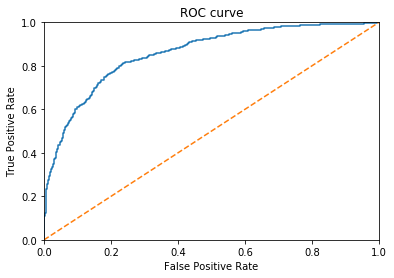

Auc_score  = 0.858


In [21]:
#Final model
final_model = RandomForestClassifier(random_state = 12345, n_estimators = 130, max_depth = 8)
final_model.fit(train_features, train_target)
predicted_test = model.predict(test_features)
f1 = f1_score(test_target, predicted_test)

print('F1 Score for final model = {:.3f}'.format(f1))

probabilities_test = model.predict_proba(test_features)
probabilities_one_test = probabilities_test[:,1]

fpr, tpr, thresholds = roc_curve(test_target, probabilities_one_test)

plt.figure()

#< plotting graph >
plt.plot(fpr, tpr)
#< ROC Curve for random model >
plt.plot([0,1],[0,1], linestyle = '--')

# < use the functions plt.xlim() and plt.ylim() to set the boundary for the axes from 0 to 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < use the functions plt.xlabel() and plt.ylabel() to name the axes >
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# < add the heading  with the function plt.title() >
plt.title('ROC curve')
plt.show()

#Auc_score
auc_score = roc_auc_score(test_target,probabilities_one_test)
print('Auc_score  = {:.3f}'.format(auc_score))

### Conclusion

Here we have trained our final model(`RFC`). And `f1_score` was 0.606 which is bigger than 0.59. And we plotted ROC curve graph here. 

## Step5. General Conclusion

In conclusion, we have made lots of things. Preprocessed data, tried to improve imbalance problems. Then we used different model, and at the end we got 0.606 f1_score with final model. Also we have plotted ROC curve and calculated area under curve. It was bigger than f1_score. To sum up `Linear Regression` model was not well enough for this task. As we described `RandomForestClassifier` was best model for this task